In [51]:
import numpy as np
from numpy import sin, sqrt, abs, sign, cos
import matplotlib.pyplot as plt
from math import prod
import mplcyberpunk

plt.style.use("cyberpunk")

# Problem 1

In [52]:
def schwefel(x):
    # many roots
    return 0 + x * sin(sqrt(abs(x)))


def wilkinson(x, n=20):
    # roots at integers from 0 to n
    return prod(x - i for i in range(n)) / 1e13


def rational(x):
    # roots at -1, 0, 1
    numerator = x**5 - 2 * x**3 + x
    denominator = x**4 + 3 * x**2 + 1
    return numerator / denominator


def combined(x):
    # roots at -1, 0, 1
    return rational(schwefel(wilkinson(x)))

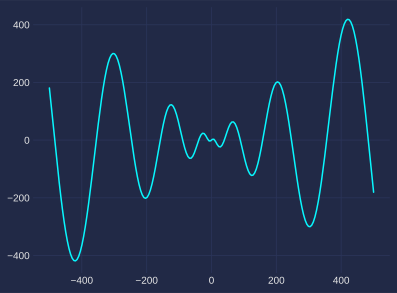

In [53]:
X = np.linspace(-500, 500, 200)
Y = schwefel(X)
plt.plot(X, Y)

(4.0, -4.0)

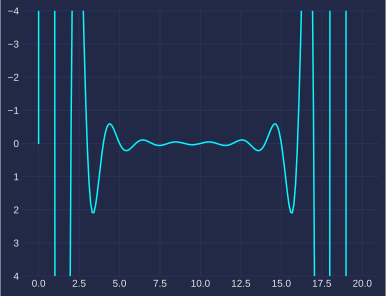

In [54]:
X = np.linspace(0, 20, 200)
Y = wilkinson(X)
plt.plot(X, Y)
plt.ylim(4, -4)

(1.0, -1.0)

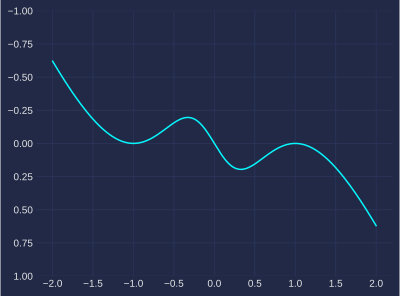

In [55]:
X = np.linspace(-2, 2, 200)
Y = rational(X)
plt.plot(X, Y)
plt.ylim(1, -1)

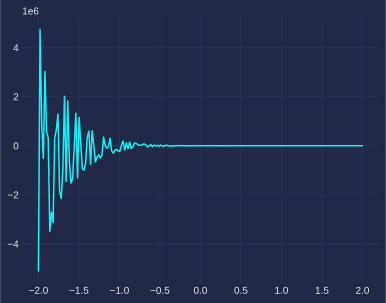

In [56]:
X = np.linspace(-2, 2, 200)
Y = combined(X)
plt.plot(X, Y)

# Problem 2

In [57]:
def newton(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x
        dfx = df(x)
        if dfx == 0:
            print("Derivative is zero. Newton's method fails.")
        x = x - fx / dfx
        if abs(x - x0) < tol:
            return x
        x0 = x
    return np.NaN

In [58]:
def dschwefel(x):
    sqa = sqrt(abs(x))
    return -sqa - sign(x) * x * cos(sqa) / (2 * sqa)

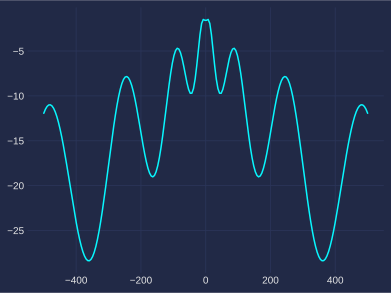

In [59]:
X = np.linspace(-500, 500, 200)
Y = dschwefel(X)
plt.plot(X, Y)

In [60]:
x = newton(schwefel, dschwefel, 0.5)
print(x, schwefel(x))

9.869604399857723 1.9346507079900233e-09


# Problem 3

In [61]:
def Δ(f, h=1e-3):
    return lambda x: (f(x + h) - f(x)) / h


def test(f, x0):
    return f(newton(f, Δ(f), x0))

In [70]:
from pandas import DataFrame

X0 = np.linspace(-10, 10, 32)

d1 = DataFrame(
    {
        "schwefel": [test(schwefel, x0) for x0 in X0],
        "wilkinson": [test(wilkinson, x0) for x0 in X0],
        "rational": [test(rational, x0) for x0 in X0],
        "combined": [test(combined, x0) for x0 in X0],
    },
    index=X0,
    dtype=object,
)

d1

,schwefel,wilkinson,rational,combined
-10.000000,0.0,0.0,-0.0,NaN
-9.354839,-0.0,0.000003,-0.0,NaN
-8.709677,0.0,0.000013,-0.0,199016853659.209839
-8.064516,-0.0,0.000032,-0.0,NaN
-7.419355,-0.0,0.000035,-0.0,NaN
-6.774194,-0.0,-0.00002,-0.000001,NaN
-6.129032,-0.0,0.0,-0.0,NaN
-5.483871,0.0,0.000001,-0.0,NaN
-4.838710,-0.0,0.0,-0.000001,NaN
-4.193548,-0.0,0.000012,-0.000001,NaN


# Problem 4

In [72]:
def Δ2(f, h=1e-3):
    return lambda x: (f(x + h) - f(x - h)) / 2 / h


def test2(f, x0):
    return f(newton(f, Δ2(f), x0))

In [73]:
from pandas import DataFrame

X0 = np.linspace(-10, 10, 32)

d2 = DataFrame(
    {
        "schwefel": [test2(schwefel, x0) for x0 in X0],
        "wilkinson": [test2(wilkinson, x0) for x0 in X0],
        "rational": [test2(rational, x0) for x0 in X0],
        "combined": [test2(combined, x0) for x0 in X0],
    },
    index=X0,
    dtype=object,
)

d2

,schwefel,wilkinson,rational,combined
-10.000000,0.0,0.0,-0.0,NaN
-9.354839,0.0,0.0,-0.0,NaN
-8.709677,0.0,0.0,-0.000001,NaN
-8.064516,0.0,0.0,-0.000001,NaN
-7.419355,0.0,0.0,-0.000001,NaN
-6.774194,0.0,0.0,-0.0,NaN
-6.129032,0.0,0.0,-0.000001,NaN
-5.483871,-0.0,0.0,-0.0,NaN
-4.838710,-0.0,0.0,-0.0,NaN
-4.193548,0.0,0.000001,-0.000001,NaN


In [78]:
d2 < d1

,schwefel,wilkinson,rational,combined
-10.000000,False,True,False,False
-9.354839,False,True,True,False
-8.709677,False,True,True,False
-8.064516,False,True,True,False
-7.419355,False,True,True,False
-6.774194,False,False,False,False
-6.129032,False,True,True,False
-5.483871,True,True,False,False
-4.838710,False,True,False,False
-4.193548,False,True,False,False
